In [34]:
 import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl


# mpl.style.use('mystyle.mplstyle')
path = pl.Path.home()/ 'Transfer_Learning_GP_Results'
fig_path = pl.Path.home()/'Transfer_Learning_GP_Results/opt_plots'

In [35]:
surface_type = 'unrelated_two_observed_10_new' #'non-linear_relation_two_observed_six_new' #'linear_relation' #'unrelated' #'non-linear_relation'
results_list = []
for n_new_points in range(2,30):
    for seed in [1, 2, 3]:
        for restarts in [1, 2, 3]:
            # print(path/f'hyperparameters/hyperparameters_{surface_type}_{n_new_points}_points_seed_{seed}.pkl')
            if os.path.exists(path/f'hyperparameters/hyperparameters_{surface_type}_{n_new_points}_points_seed_{seed}.pkl'):
                with open(path/f'hyperparameters/hyperparameters_{surface_type}_{n_new_points}_points_seed_{seed}.pkl', 'rb') as f:
                    df = pickle.load(f)
                    df['n_new_points'] = n_new_points
                    df['seed'] = seed
                    results_list.append(df)

In [36]:
results_df = pd.concat(results_list)

Plot the optimisation of the models


KeyError: 'surface_type'

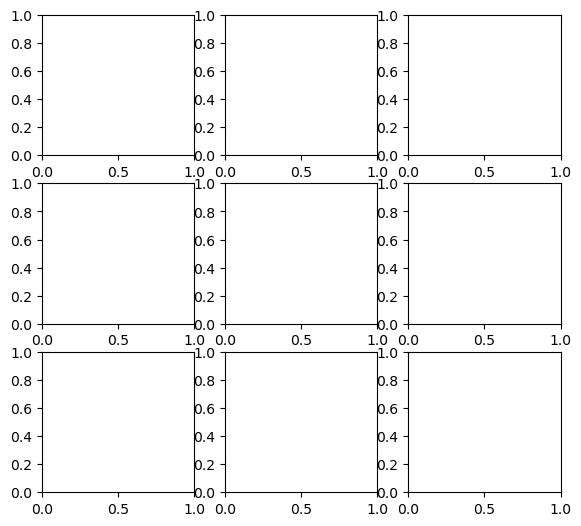

In [38]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontsize=12)
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

mod_names = {'indi':'MOGP', 'lmc':'LMC', 'VI':'LVMOGP'}

labels = {'indi':{'indi': 'random init'},
          'lmc':{'lmc random_W_and_k': 'both W and $\kappa$ random',
                 'lmc random_W_and_k_0': 'W random and $\kappa=0$',
                 'lmc random_W_and_k_1': 'W random and $\kappa=1$'},
          'VI':{'VI semi_random':'semi_random',
          'VI random':'random',
          'VI gpy':'gpy',
                'VI mo_pca': 'PCA'}}

surface_types = ['unrelated_two_observed_10_new','linear_relation_two_observed_10_new',
                 'non-linear_relation_two_observed_10_new']

surface_type_names = {'unrelated_two_observed_10_new':'Uncorrelated','linear_relation_two_observed_10_new':'Linearly Correlated',
                 'non-linear_relation_two_observed_10_new':'Non-Linearly Correlated'}
seeds = [1, 2, 3]
cm = 1/2.54
# 'indi', 'lmc', 'VI', 'MAP'
# seeds = [1, 2, 3]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(17*cm, 6.2))
grid = plt.GridSpec(3, 3)
for k, surface_type in enumerate(surface_types):
    for j, seed in enumerate(seeds):

            for metric in ['elbo']:
                colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
                inits = results_df_model.index.unique().to_list()
                np.random.shuffle(inits)
                for i, init_name in enumerate(inits):
                    df = results_df_model[results_df_model.index == init_name]
                    dfs_max = []
                    dfs_min = []
                    for n_train in df['n_train'].unique():
                        df_max = df[(df['n_train'] == n_train)]
                        df_max = df_max[df_max['elbo'] == df_max['elbo'].max()]
                        df_min = df[(df['n_train'] == n_train)]
                        df_min = df_min[df_min['elbo'] == df_min['elbo'].min()]
                        dfs_min.append(df_min)
                        dfs_max.append(df_max)
                    dfs_min = pd.concat(dfs_min)
                    dfs_max = pd.concat(dfs_max)
                    x = dfs_max['n_train']
                    y = dfs_max[metric]
                    x2 = dfs_min['n_train']
                    y2 = dfs_min[metric]
                    axs[k,j].plot(x, y, label = labels[model][init_name], color=colors[i])
                    axs[k,j].plot(x2, y2,  linewidth=1, linestyle=":", color=colors[i]) #label = f'{init_name} min elbo',
                    # results_df[results_df['index']==model].plot(x='n_train', y=metric, ax=ax,)
                    # axs[0, j].set_title(f'seed {seed}')

                    axs[k, j].set_title(f'seed {seed}')
        if model == 'VI':
            axs[k, 0].set_ylabel('ELBO')
        else:
            axs[k, 0].set_ylabel('LML')
        axs[k, 1].set_xlabel('number of points on new functions')
        create_subtitle(fig, grid[k, ::], f'{surface_type_names[surface_type]}')
        k+=1

    axs[2, 1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.8), ncol=len(labels[model]))
    plt.subplots_adjust(hspace=0.9, wspace=0.3)
    plt.suptitle(f'{mod_names[model]} Log Marginal Likelihood')
    for ax in axs.flat:
        ax.locator_params(axis='x', nbins=4)
        ax.locator_params(axis='y', nbins=3)

    plt.savefig(fig_path+f'/{model}_grid_elbos.png',
                bbox_inches='tight', dpi=1000)



Notebook where we compare the LMLs of each of the models for the different cases and inits.